# Метрики precision и recall (Домашнее задание)

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [70]:
import pandas as pd
import  matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [6]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [10]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [11]:
predictions = model.predict_proba(X_test)

In [ ]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [13]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [14]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [15]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [16]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [17]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [18]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [19]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [20]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.048952985117842504)
(0.3074501573976915, 0.9982964224872232, 0.05209819056934388)
(0.30761154855643047, 0.9982964224872232, 0.05253954528286743)
(0.3077731092436975, 0.9982964224872232, 0.05290951929272509)
(0.30793483972674723, 0.9982964224872232, 0.053728564357192615)
(0.30809674027339645, 0.9982964224872232, 0.05418294143643712)
(0.30825881115202525, 0.9982964224872232, 0.054563821490810495)
(0.30842105263157893, 0.9982964224872232, 0.054741311395802884)
(0.30858346498156924, 0.9982964224872232, 0.05545339818845979)
(0.3087460484720759, 0.9982964224872232, 0.057801337143055465)
(0.30890880337374804, 0.9982964224872232, 0.05932824315035663)
(0.3090717299578059, 0.9982964224872232, 0.059365539939478275)
(0.3092348284960422, 0.9982964224872232, 0.061822304179145374)
(0.3093980992608237, 0.9982964224872232, 0.062105311187778456)
(0.30956154252509244, 0.9982964224872232, 0.06244017363420714)
(0.3091966173361522, 0.9965928449744463, 0.06245992805084293)
(0.30936

In [21]:
from sklearn.metrics import average_precision_score

In [22]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [23]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [63]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [ ]:
for line in zip( fpr, tpr, thres ):
    print( line )

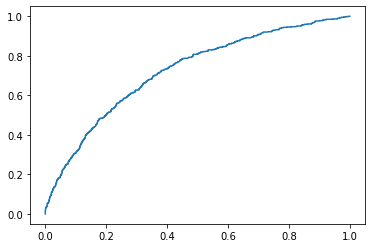

In [28]:
plt.plot( fpr, tpr )

### Домашнее задание

In [33]:
def metrics(predictions, Y_test, thresh):
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thresh:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, tn, fn

In [51]:
print(len(fpr))

850


In [69]:
tpr_hw = []
fpr_hw = []
pr_hw = []

for thresh in thres:
    tp, fp, tn, fn = metrics(predictions, Y_test, thresh)
    try:
        pr_hw.append(tp / (tp + fp))
        tpr_hw.append(tp / (tp + fn))
        fpr_hw.append(fp / (fp + tn))
    except:
        pass

Сравниваем графики ROC

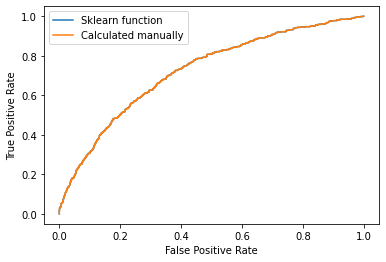

In [67]:
plt.plot( fpr, tpr, label = 'Sklearn function' )
plt.plot( fpr_hw, tpr_hw, label = 'Calculated manually' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

Сравниваем графики Precision - Recall

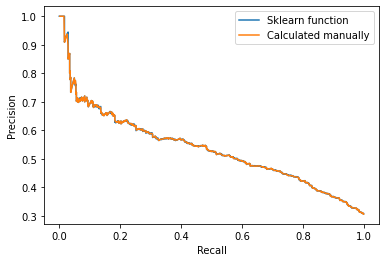

In [62]:
plt.plot( re, pr, label = 'Sklearn function' )
plt.plot( tpr_hw, pr_hw, label = 'Calculated manually' )

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend( loc = 0 )
plt.show()

**Вывод:** графики ROC и Precision - Recall, построенные с помощью функций библиотеки Sklearn и вручную, практически идентичны.